# Introduction to Simple Linear Regression


## Learning Objectives and outcomes

- Introduction of linear regression in the simple setting.

- Basic assumptions of the model.

- Terminology - 'intercept', 'coefficient'.

- The Least Square method.
    
- Implement linear regression in sklearn.




In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## read data to a dataframe
df = pd.read_csv('data/kc_house_data.csv')
## scale price with 1000 so that it will be easier 

In [3]:
df['price_scaled'] = df.price/1000
df_now = df[['price_scaled','sqft_living']]

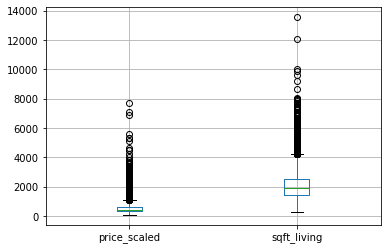

In [4]:
df_now.boxplot();
# plt.boxplot(df_now.price_scaled,);

In [5]:
df_now.shape

(21613, 2)

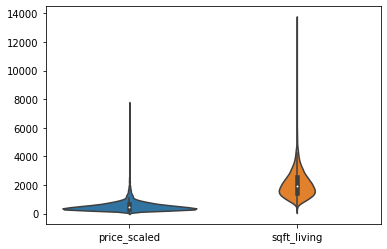

In [6]:
import seaborn as sns
sns.violinplot(data=df_now);

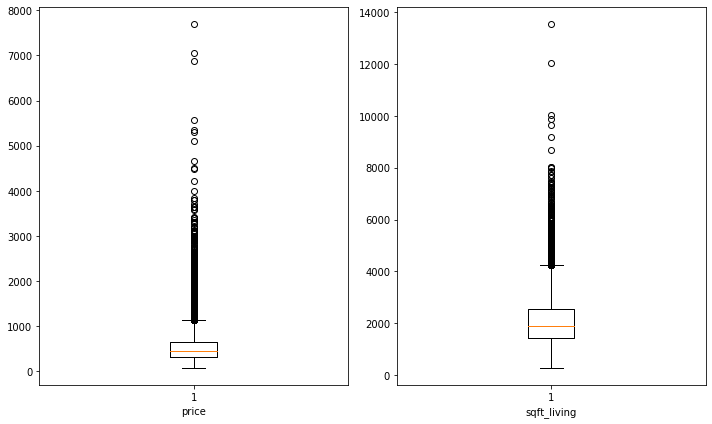

In [7]:
## visualize the 'price' and 'sqft_living' with boxplot
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,6),tight_layout=True)

ax1.boxplot(df_now.price_scaled)
ax1.set_xlabel('price')

ax2.boxplot(df_now.sqft_living)
ax2.set_xlabel('sqft_living');

In [8]:
## use pandas for boxplots

In [9]:
## AS you can see there are outliers - let's cut them from our dataset 
## use 0.98 as the quantile

df_now.quantile(q=.99)

price_scaled    1964.4
sqft_living     4978.8
Name: 0.99, dtype: float64

In [10]:
len(df_now.loc[df_now.price_scaled > 1964])

217

In [11]:
#cutting data (both column) with .98 percentile threshold 
#apply boolean masking

idx = (df_now<df_now.quantile(q=.98)).all(axis=1)
data = df_now[idx]
data.columns=['price','sqft_living']

data.head()

,price,sqft_living
0,221.9,1180
1,538.0,2570
2,180.0,770
3,604.0,1960
4,510.0,1680


### Assumptions

* Assume $\mbox{price} \approx \mbox{sqft_living}$  linearly.

* There is an initial value (baseline) of the price. 

* Data might not be exactly linear but the errors are random.

### Model  - Single Variable Case

$$ Y = b_{0} + b_{1}X + \epsilon$$
 
- $ b_{0}, b_{1}$ are called the intercept and coefficient of the linear model respectively. 

- $\epsilon$ is the error term.

- Given $\widehat{b_{0}}$ and $\widehat{b_{1}}$ we will make a prediction:

$$ \widehat{y_{i}} = \widehat{b_{0}} + \widehat{b_{1}} x_{i} $$

<img src="best_fit.png" cap="Transformed dataset"  width='300'/>



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


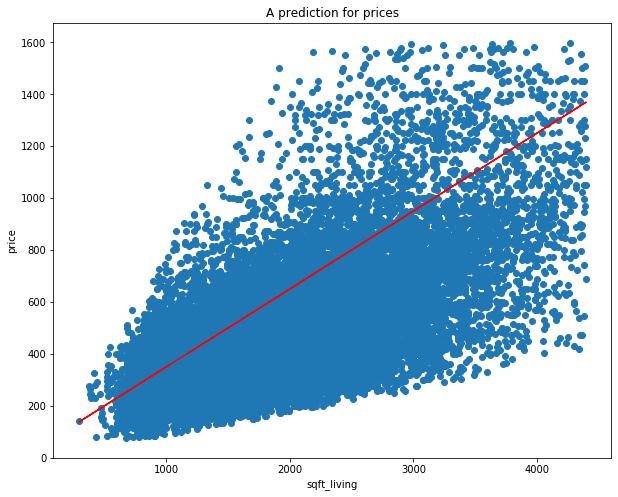

In [12]:
## play with this function what happens when you change b0_hat and b1_hat
X = data.sqft_living.values
y = data.price.values


def pred(b0_hat, b1_hat):
    y_pred = b0_hat + b1_hat * X
    
    
    data['predicted'] = y_pred
    
    # Data for plotting
    t = data.sqft_living.values
    s = data.predicted.values
    
    plt.figure(figsize= (10,8))

    

    plt.scatter(x= data.sqft_living, y= data.price)
    plt.plot(t, s, c= 'r')

    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.title('A prediction for prices')

    plt.show()
    return 

pred(50, 0.3)


### What do we mean by 'best fitting line'? Least Squares

<a name="least_squares">
</a>

__Q: How to find 'best' line?__


<img src="errors.png" cap="Transformed dataset"  width='500'/>



* Recall that we know actual values $y$ for the prices and for any coefficients $b_{0}, b_{1}$ we can make a prediction $\widehat{y}$. 

* Error for each prediction $e_{i} = y_{i} - \widehat{y_{i}}$



### Residual sum of squares


$$RSS = e_{1}^{2} + e_{2}^{2} + \cdots + e_{n}^{2}$$

* Wait a minute! Why do we get the squares?


The least square method minimizes the RSS.

* Good news: The least square can be calculated exactly because it has a closed form:

$$ \mbox{RSS} = (y_1 - \widehat{b_{0}} -\widehat{b_{1}}x_{1} )^{2} + (y_2 - \widehat{b_{0}} -\widehat{b_{1}}x_{2} )^{2} + \cdots + (y_n - \widehat{b_{0}} -\widehat{b_{1}}x_{n} )^{2}$$

* Bad news: It requires derivatives and is complicated to derive. But no worries, python will take care of this step for us.

$$ b_{1} = \dfrac{\sum^{n}_{i=1} (x_i - \bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_i - \bar{x})^{2}}$$

and 

$$ b_0 = \bar{y} - b_{1}\bar{x} $$


Let's see linear regression in action.


<a name="sklearn">
</a>

## Linear Regression Using sklearn

In [13]:
# define X and y again here and reshape them
X = data.sqft_living.values
y = data.price.values

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X.shape,y.shape

((20923, 1), (20923, 1))

In [34]:
# # import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# # Initialize the LinearRegression Object
# lr = LinearRegression(fit_intercept=True)
lr = LinearRegression()
# # Fit the model
lr.fit(X,y)

print(lr.intercept_, lr.coef_)


[91.32238849] [[0.20386244]]


In [22]:
## call pred function to see the 'best fitting line'

y_predict=lr.predict(X)


In [23]:
#print coefficients
print(f"Coefficients: {lr.coef_}")

# Print the mean squared error
print(f"Mean squared error: {mean_squared_error(y,y_predict):.2}")

#Print variance score
print(f"Variance score: {r2_score(y,y_predict)}")


Coefficients: [[0.20386244]]
Mean squared error: 3.6e+04
Variance score: 0.4060888281119893


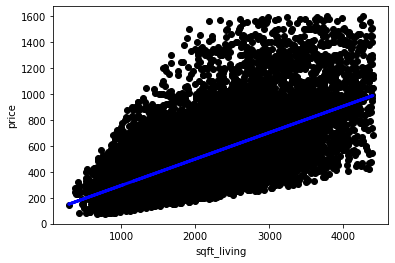

In [17]:
# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, y_predict, color='blue', linewidth=3)
plt.xlabel('sqft_living')
plt.ylabel('price');

### Try doing it with statsmodel

In [57]:
X = data.sqft_living.values
y = data.price.values

#statsmodels doesnt include intercept in its linear regression 
#so you have to add it manually

X = sm.add_constant(X)


In [58]:
import statsmodels.api as sm
results = sm.OLS(y,X).fit()

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                 1.430e+04
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:35:37   Log-Likelihood:            -1.3945e+05
No. Observations:               20923   AIC:                         2.789e+05
Df Residuals:                   20921   BIC:                         2.789e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.3224      3.643     25.070      0.000      84.182      98.462
x1             0.2039      0.002    119.603      0.000       0.201       0.207
==============================================================================
Omnibus:                     3452.713   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7188.724
Skew:                           0.990   Prob(JB):                         0.00
Kurtosis:                       5.080   Cond. No.                     5.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

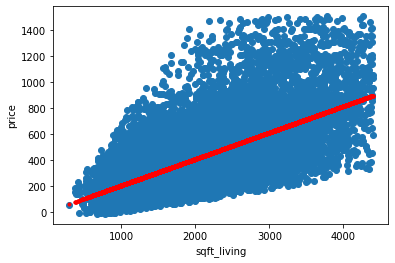

In [53]:
plt.scatter(X,y)
plt.plot(X, results.fittedvalues, 'r.', label="OLS")
plt.xlabel('sqft_living')
plt.ylabel('price');

## Further Reading <a name='further_reading'></a>

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf